<a href="https://colab.research.google.com/github/masp42/integrate_CA/blob/main/Marcelo_Pugliesi_Mohamed_AI_DV_DP_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(readr)
library(lubridate)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(purrr)
library(stringr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.1.4     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lu

In [2]:
df <- read.csv("https://raw.githubusercontent.com/masp42/integrate_CA/main/forestfires.csv")

In [3]:
head(df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [4]:
# Number of data cases and variables
dim(df)

[1] 517  13

In [5]:
# Names of variables
colnames(df)

[1] "X"     "Y"     "month" "day"   "FFMC"  "DMC"   "DC"    "ISI"   "temp" 
[10] "RH"    "wind"  "rain"  "area"

In [6]:
# Checking if any data is missing
sum(is.na(df))

[1] 0

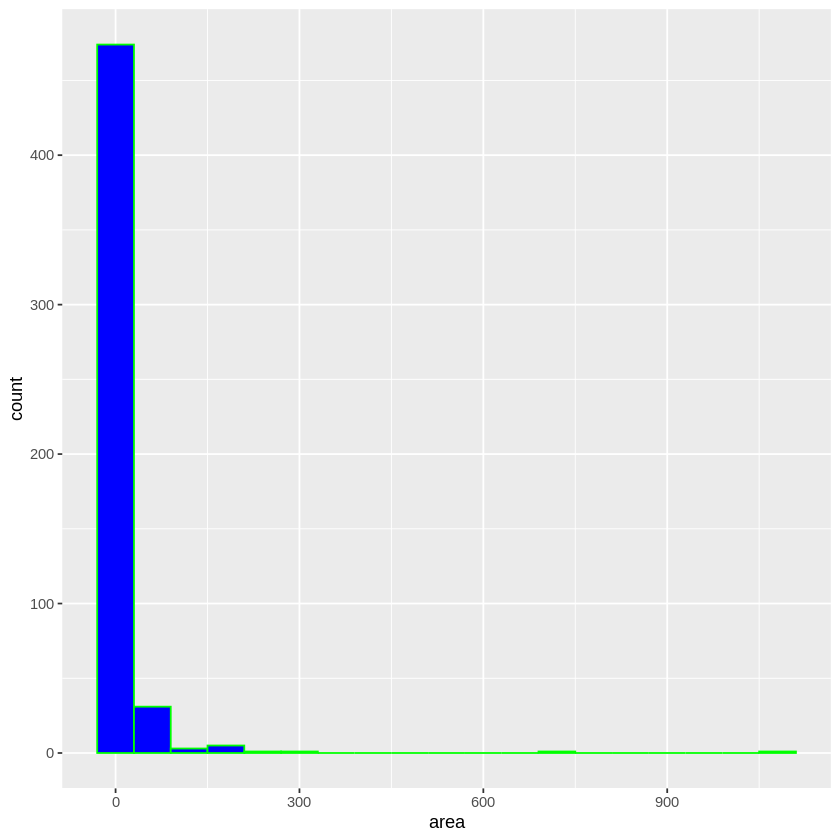

In [7]:
# Checking existance of Outliers

ggplot(df, aes(x = area)) +
  geom_histogram( bins = 50, binwidth=60, color = 'green',fill = 'blue')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



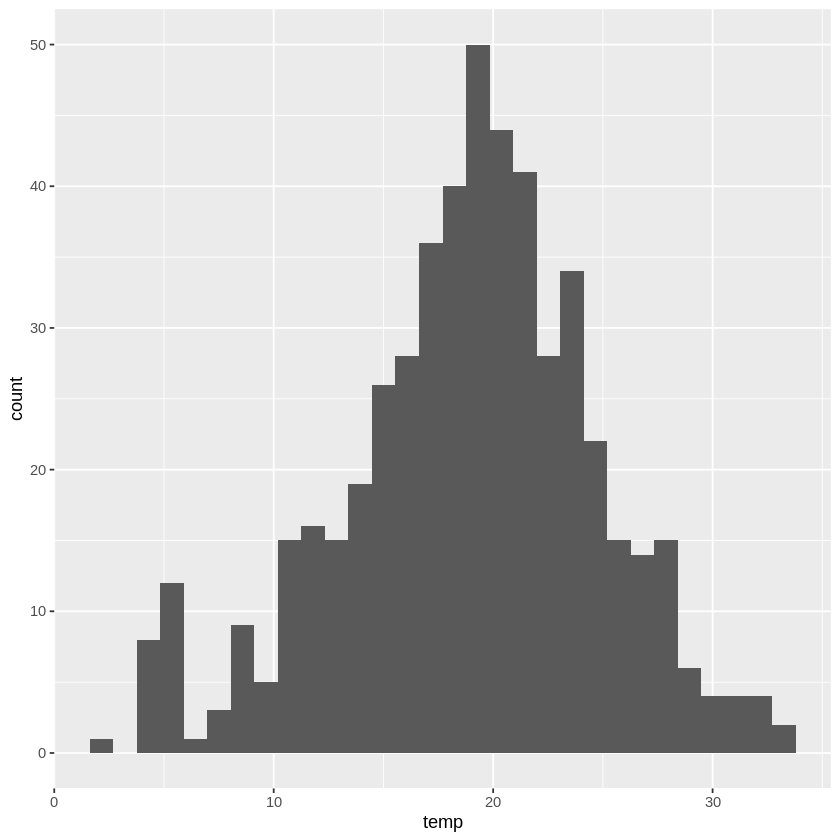

In [8]:


# Checking existance of Outliers

ggplot(df, aes(x = temp)) +
  geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



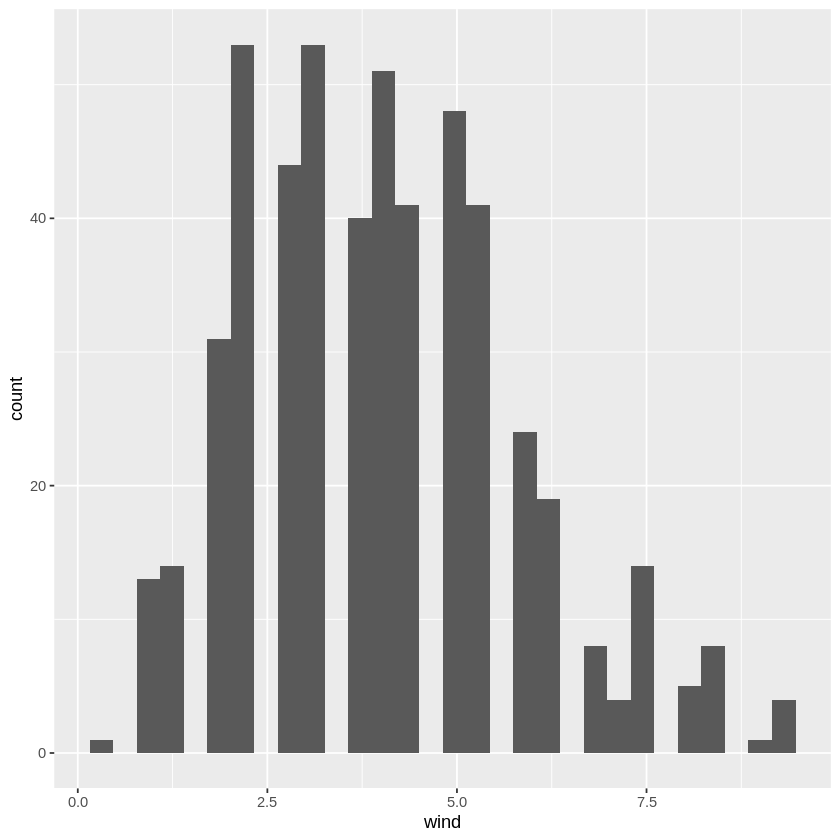

In [9]:
# Checking existance of Outliers

ggplot(df, aes(x = wind)) +
  geom_histogram()

In [10]:

# Converting Month abreviation to capital letters
df$month = str_to_title(df$month)
df

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
7,5,Mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,Oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,Oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,Mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,Mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,Aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0
8,6,Aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0
8,6,Aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0
8,6,Sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0


In [20]:
df_new = df

df_new = match(df$month, month.abb)


In [21]:
df

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,8,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0
8,6,8,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0
8,6,8,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0
8,6,9,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0


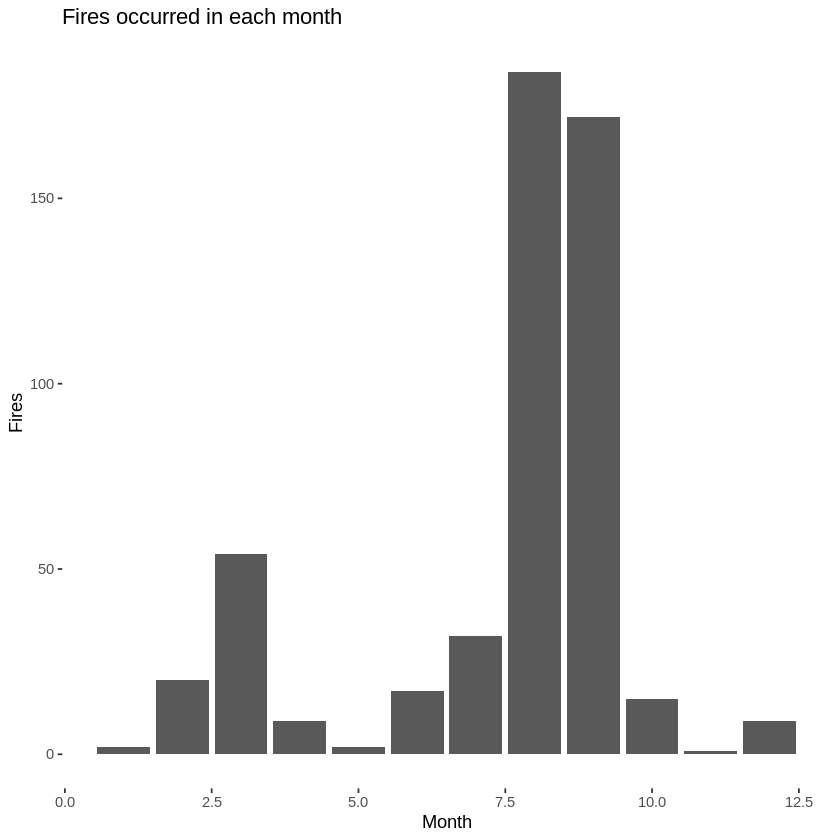

In [22]:
fireinmonths <- df %>%
  group_by(month) %>%
  summarize(count = n())
ggplot(fireinmonths) +
  aes(x = month, y = count) + 
  geom_bar(stat = "identity") + 
  labs(title = "Fires occurred in each month", x = "Month", y = "Fires") + 
  theme(panel.background = element_rect(fill = "white"))  